# Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score, recall_score, precision_score, auc
from sklearn.metrics import classification_report, f1_score, fbeta_score

In [3]:

df_diabetes = pd.read_csv('diabetes.csv')

In [4]:
df_diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


Temos registros de pacientes com e sem diabetes e informações como:
- preg: Number of times pregnant
- plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- press: Diastolic blood pressure (mm Hg)
- skin: Triceps skin fold thickness (mm)
- insu: 2-Hour serum insulin (mu U/ml)
- mass: Body mass index (weight in kg/(height in m)^2)
- pedi: Diabetes pedigree function
- age: Age (years)
- class: Label (1: tested_positive, 0: tested_negative)

Com um gráfico simples de dispersão (distinguindo as classes por meio de cores, conseguimos ter uma ideia geral das melhores features)

# Ajuste da Regressão Logística

Por enquanto não iremos nos preocupar com divisão em treino e teste.

Precisamos converter o Y para numérico (dummy)

In [5]:
df_diabetes.replace({'tested_positive' : 1, 'tested_negative': 0}, inplace = True)

In [6]:
df_diabetes.rename(columns={'class':'diabetes'} , inplace=True)

In [7]:
df_diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
function_formula = 'diabetes ~ preg + plas + pres + skin + insu + mass + pedi + age'
reg_log = smf.logit(formula = function_formula , data = df_diabetes)
reg_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


In [9]:
print(reg_log.summary())

                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                  0.2718
Time:                        18:53:36   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4047      0.717    -11.728      0.000      -9.809      -7.000
preg           0.1232      0.032      3.840      0.000       0.060       0.186
plas           0.0352      0.004      9.481      0.0

## Interpretação dos Betas

In [11]:
print ("Odds Ratios")
print ("======================")
print (np.exp(reg_log.params))

Odds Ratios
Intercept    0.000224
preg         1.131091
plas         1.035789
pres         0.986792
skin         1.000619
insu         0.998809
mass         1.093847
pedi         2.573276
age          1.014980
dtype: float64


- preg: A cada uma gravidez a mais das mulheres desta observação, a chance de terem a condição de diabetes aumenta em (1.131 - 1.00) * 100% = 13.1%
- plas: A cada um ponto a mais na concentação de glicose no plasma das mulheres desta observação, a chance de terem a condição de diabetes aumenta em (1.036 - 1.00) * 100% = 3.6%
- pres: A cada um ponto a mais na pressão sanguínea diastólica das mulheres desta observação, a chance de terem a condição de diabetes diminui em (0.987 - 1.00) * 100% = -1.3%
- skin: A cada um ponto a mais na espessura da pele do tríceps das mulheres desta observação, a chance de terem a condição de diabetes aumenta em (1.001 - 1.00) * 100% = 0.1%
- insu: A cada um ponto a mais na insulina sérica das mulheres desta observação, a chance de terem a condição de diabetes diminui em (0.999 - 1.00) * 100% = -1.0%
- mass: A cada um ponto a mais no índice de massa corpórea das mulheres desta observação, a chance de terem a condição de diabetes aumenta em (1.094 - 1.00) * 100% = 9.4%
- pedi: A cada um ponto a mais na predisposição genética das mulheres desta observação, a chance de terem a condição de diabetes aumenta em (2.573 - 1.00) * 100% = 157.3%
- age: A cada ano a mais de idade das mulheres desta observação, a chance de terem a condição de diabetes aumenta em (1.015 - 1.00) * 100% = 1.5%

# Métricas

## F-Beta Score

In [12]:
X = df_diabetes.drop('diabetes', axis=1)
Y = df_diabetes['diabetes']

In [13]:
Y_predict = reg_log.predict(X)

In [14]:
# listas com os scores
f1_scores = []
f0_5_scores = []
f2_scores = []
precision_scores = []
recall_scores = []

# lista com thresholds
thresholds = np.linspace(0, 1, num=100)

In [15]:
for thresh in thresholds:
    
    y_predict_bool = Y_predict >= thresh
    f1 = f1_score(Y, y_predict_bool)
    f0_5 = fbeta_score(Y, y_predict_bool, beta=0.5)
    f2 = fbeta_score(Y, y_predict_bool, beta=2)
    precision = precision_score(Y, y_predict_bool)
    recall = recall_score(Y, y_predict_bool)
        
    f1_scores.append(f1)
    f0_5_scores.append(f0_5)
    f2_scores.append(f2)
    precision_scores.append(precision)
    recall_scores.append(recall)

C:\Users\vibrsilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


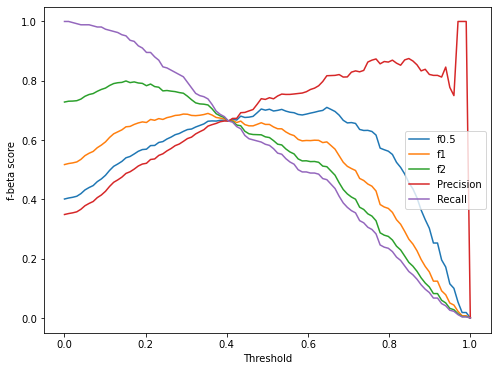

In [16]:
# Plot f_beta, precision, recall 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(thresholds, f0_5_scores , label='f0.5')
ax.plot(thresholds, f1_scores, label='f1')
ax.plot(thresholds, f2_scores, label='f2')
ax.plot(thresholds, precision_scores, label='Precision')
ax.plot(thresholds, recall_scores, label='Recall')
ax.set_xlabel('Threshold')
ax.set_ylabel('f-beta score')
ax.legend(loc='center right');


- Se o Recall for mais importante, olharíamos a curva verde (f2) e escolheríamos um threshold um poiuco abaixo de 0.2
- Se o Precision for mais importante, olharíamos a curva azul (f(0.5) e escolheríamos um threshold próximo de 0.65

## Curva ROC

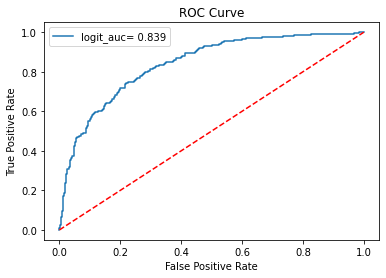

In [17]:
fpr,tpr,thresholds = roc_curve(Y,Y_predict)

logit_auc = roc_auc_score(Y,Y_predict)

plt.plot(fpr,tpr,label='logit_auc= %0.3f'%logit_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## Curva PR

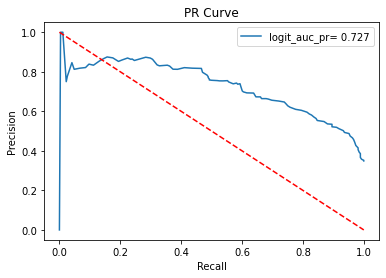

In [18]:
#plot da curva
auc_pr = auc(recall_scores, precision_scores)

plt.plot(recall_scores,precision_scores,label='logit_auc_pr= %0.3f'%auc_pr)
plt.plot([0,1],[1,0],'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc='best')
plt.show()